<a href="https://colab.research.google.com/github/Ratchana-VITC/Breast_cancer_predictor_ML_model/blob/main/Breast_cancer_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kaggle → Breast Cancer Wisconsin (Diagnostic)
!pip -q install kaggle
from google.colab import files
import os, json, zipfile, pandas as pd

# 1) Upload kaggle.json (only once per runtime)
if not os.path.exists('/root/.kaggle/kaggle.json'):
    print("➡️ Upload your kaggle.json")
    files.upload()
    os.makedirs('/root/.kaggle', exist_ok=True)
    os.replace('kaggle.json', '/root/.kaggle/kaggle.json')
    os.chmod('/root/.kaggle/kaggle.json', 0o600)

# 2) Download & unzip
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data -p /content/breast-cancer -q
!unzip -o /content/breast-cancer/breast-cancer-wisconsin-data.zip -d /content/breast-cancer >/dev/null

# 3) Load CSV
df = pd.read_csv('/content/breast-cancer/data.csv')
print(df.shape)
df.head()


➡️ Upload your kaggle.json


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


This file should store same template as the one created earlier

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Drop empty column if present
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

# Target
Y = df['diagnosis'].map({'M': 1, 'B': 0})

# Features (all numeric)
X = df.drop(columns=['id', 'diagnosis'], errors='ignore')

# Impute any missing numeric values (just in case)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("X shape:", X.shape)
print("Y distribution:\n", Y.value_counts())


X shape: (569, 30)
Y distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (455, 30)  Test: (114, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, n_jobs=None),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = {}
reports = {}
best_name, best_score = None, -1

for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, preds)
    results[name] = acc
    reports[name] = classification_report(Y_test, preds, output_dict=False)
    if acc > best_score:
        best_name, best_score = name, acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(Y_test, preds))

print(f"\n✅ Best model: {best_name} ({best_score:.4f})")



Logistic Regression Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Random Forest Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96   

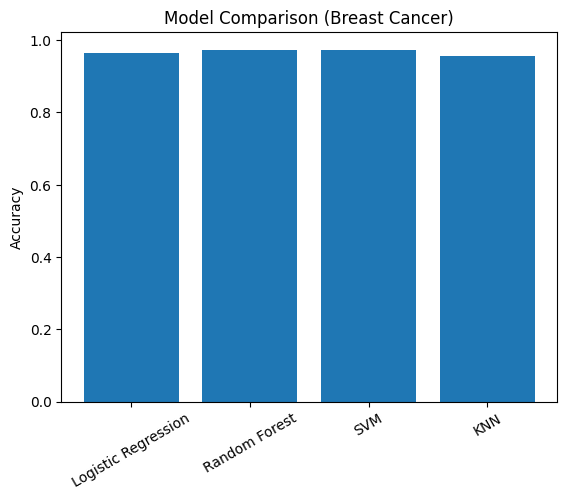

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(list(results.keys()), list(results.values()))
plt.title("Model Comparison (Breast Cancer)")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

In [ ]:
import joblib

best_model = models[best_name]
joblib.dump(best_model, "breast_rf_model.pkl")   # name kept for consistency
joblib.dump(scaler, "breast_scaler.pkl")

print("💾 Saved:", "breast_rf_model.pkl", "breast_scaler.pkl")

💾 Saved: breast_rf_model.pkl breast_scaler.pkl


In [ ]:
# Empty (headers only) – for handover
pd.DataFrame(columns=X.columns).to_csv('Breast_user_template.csv', index=False)

# Sample (one filled row) – for demo
pd.DataFrame([X.iloc[0].values], columns=X.columns).to_csv('Breast_user_sample.csv', index=False)

print("✅ Saved templates: Breast_user_template.csv (empty), Breast_user_sample.csv (1 row)")

✅ Saved templates: Breast_user_template.csv (empty), Breast_user_sample.csv (1 row)


In [9]:
# Select 4 random rows from dataset as demo input
sample_users = X.sample(4, random_state=42)

# Save them as user input file
sample_users.to_csv("Breast_user_sample.csv", index=False)

print("✅ 4 sample rows saved to Breast_user_sample.csv")
sample_users.head()

✅ 4 sample rows saved to Breast_user_sample.csv


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.0737,0.2556,0.09359


In [10]:
import joblib, pandas as pd, os

# Choose which user file to read:
USER_FILE = "Breast_user_sample.csv"   # for demo; change to "Breast_user_template.csv" after filling values

# Load model & scaler
assert os.path.exists("breast_rf_model.pkl"), "breast_rf_model.pkl not found. Run the save cell above."
assert os.path.exists("breast_scaler.pkl"), "breast_scaler.pkl not found. Run the save cell above."
model  = joblib.load("breast_rf_model.pkl")
scaler = joblib.load("breast_scaler.pkl")

# Load user data
user_df = pd.read_csv(USER_FILE)
if user_df.empty:
    raise ValueError(f"⚠️ {USER_FILE} is empty. Please add at least one row of values.")

# Align columns to training features
user_df = user_df.reindex(columns=X.columns, fill_value=0)

# Scale & predict
user_scaled = scaler.transform(user_df)
preds = model.predict(user_scaled)

# Human-readable labels
user_df['Breast_Cancer_Prediction'] = pd.Series(preds).map({1: 'Malignant', 0: 'Benign'})
user_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Breast_Cancer_Prediction
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.08750,Benign
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589,Malignant
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,Malignant
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.0737,0.2556,0.09359,Benign
